## Importing Libraries

In [432]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## 1. Load the data

In [433]:
df = pd.read_csv('Cars.csv')

In [434]:
#print the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [435]:
#check the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [436]:
#check the shape of the data
df.shape

(8128, 13)

In [437]:
#check the dtypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [438]:
#check Null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [439]:
#check the statistical info of the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. Exploratory Data Analysis

### Label Encoding

In [440]:
#check dtypes of the data
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [441]:
# Label encoding and mapping First owner to 1, ..., Test Drive Car to 5
# Define the mapping
df["owner"] = df["owner"].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5 })
df["owner"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [442]:
# Remove rows where 'fuel' is 'CNG' or 'LPG'
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [443]:
#For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split
# Remove 'kmpl' and convert to float
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [444]:
# For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
# Remove 'CC' and convert to float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)

In [445]:
# Do the same for max power
# Remove 'bph' and convert to float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)

In [446]:
# Take only the first word from the name column and rename it to 'brand'
df['name'] = df['name'].str.split(' ').str[0]
df = df.rename(columns={'name': 'brand'}) 

In [447]:
# Drop the feature torque
df.drop(columns = ['torque'], inplace=True)

In [448]:
# Delete all samples related to Owner == Test Drive Car which is 5
df = df[~df['owner'].isin([5])]

In [449]:
df.head()
# df.columns

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis

### Distribution Plot

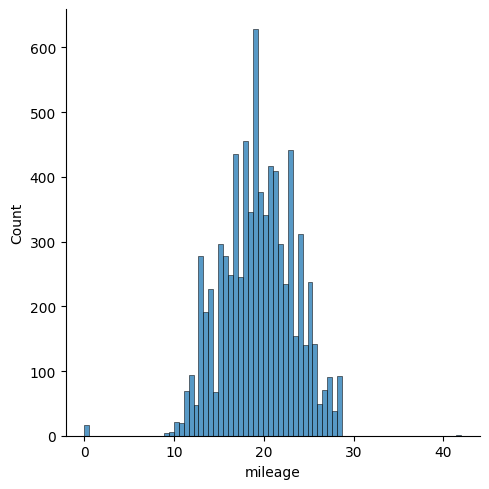

In [450]:
sns.displot(data = df, x = 'mileage')

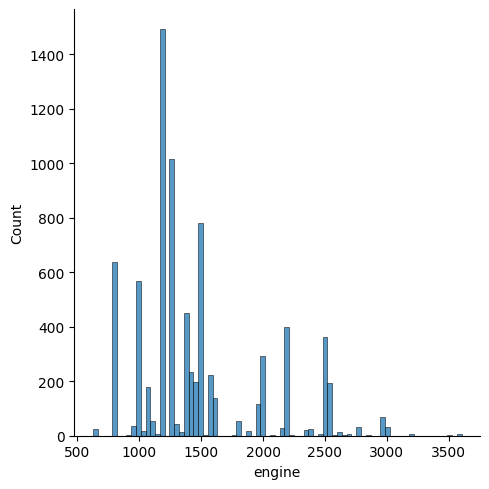

In [451]:
sns.displot(data = df, x = 'engine')

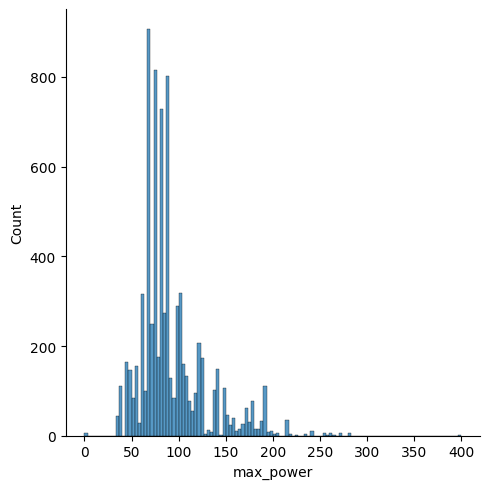

In [452]:
sns.displot(data = df, x = 'max_power')

### Countplot

##### Columns 'fuel', 'seller_type' and 'seats' can be analyzed using count plot since it has few variations

<Axes: xlabel='fuel', ylabel='count'>

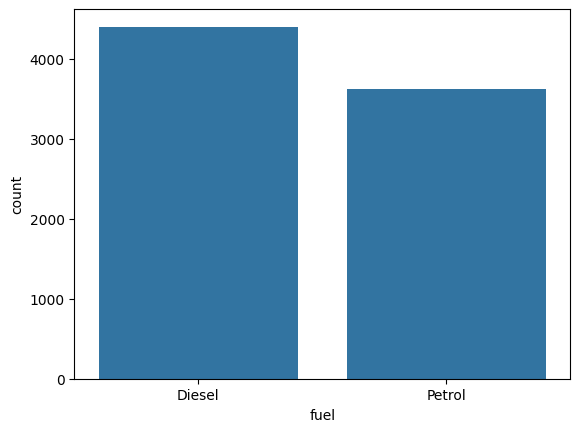

In [453]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

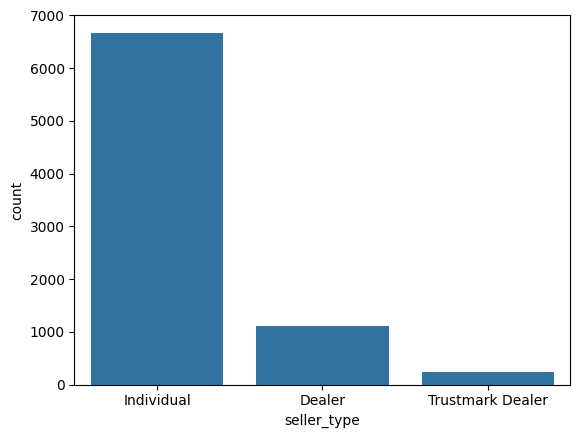

In [454]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='seats', ylabel='count'>

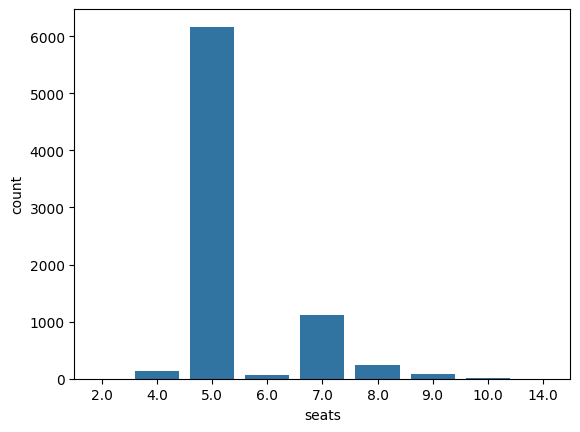

In [455]:
sns.countplot(data = df, x = 'seats')

In [456]:
df['selling_price'] = np.log(df['selling_price'])
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

## 3. Feature Engineering

## 4. Feature Selection

In [457]:
#X is the features used to predict cars' selling price 
X = df[   ['year', 'mileage', 'max_power']   ]

#y is the cars' selling price
y = df['selling_price']

### Train and Split

In [458]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [459]:
X_train.shape ,  X_test.shape

((6422, 3), (1606, 3))

In [460]:
y_train.shape , y_test.shape

((6422,), (1606,))

## 5. Preprocessing

In [461]:
#check for null values
X_train.isna().sum()

year           0
mileage      171
max_power    165
dtype: int64

In [462]:
y_train.isna().sum()

0

In [463]:
X_test.isna().sum()

year          0
mileage      43
max_power    43
dtype: int64

In [464]:
y_test.isna().sum()

0

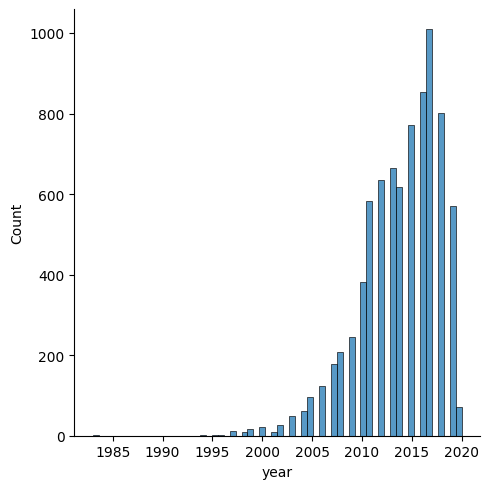

In [465]:
sns.displot( data = df, x = 'year' )

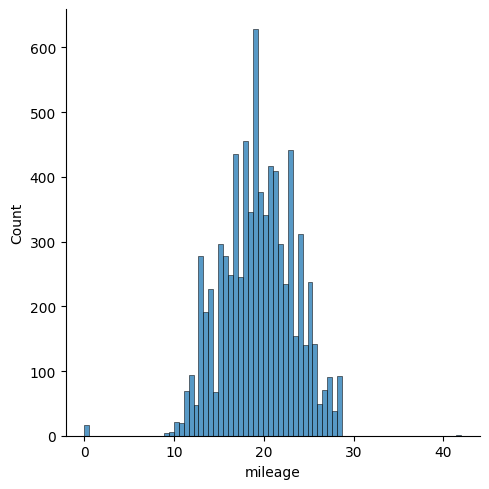

In [466]:
sns.displot(data = df, x = 'mileage')

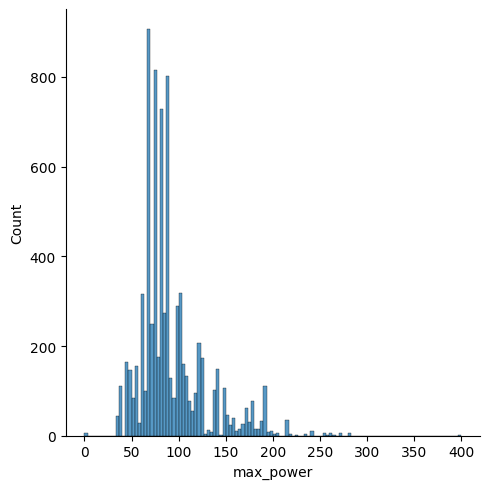

In [467]:
sns.displot(data=df, x = 'max_power')

In [468]:
#let's fill the training set first!
# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [469]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [470]:
#check again
X_train.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [471]:
X_train.isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [472]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking outliners

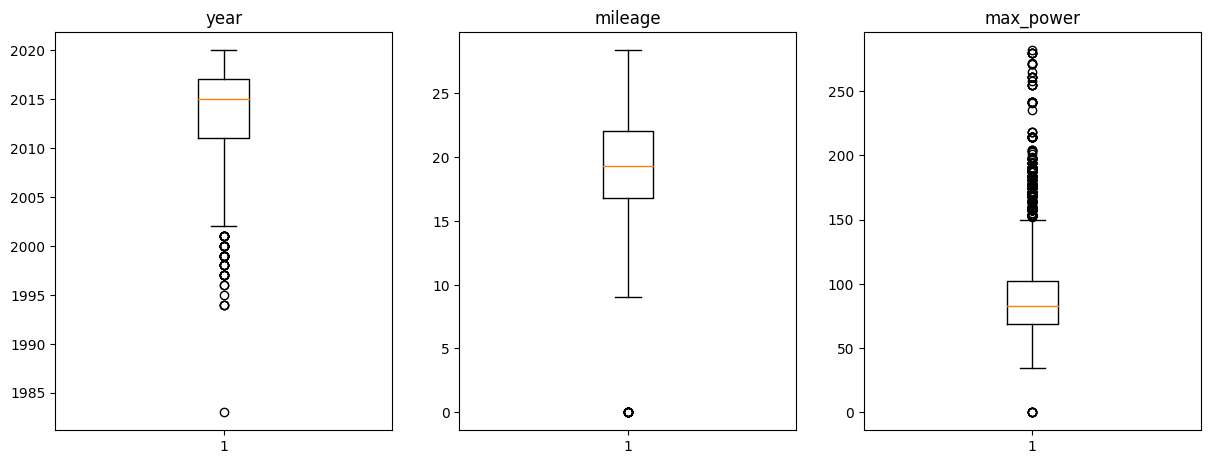

In [473]:
# Create a dictionary of columns.
col_dict = {'year':1,'mileage':2, 'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [474]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [475]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### Scaling

In [476]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling helps improve reach convergence faster
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

In [477]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 6. Modeling

In [478]:
from sklearn.linear_model import LinearRegression  #using regression model
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.1085660211799154
r2:  0.8475499065024805


### Cross Validation + Grid Search

In [479]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [480]:
from sklearn.model_selection import KFold, cross_val_score

# Define lists to store mse
train_mse = []
test_mse = []

# Define the number of splits
kfold = KFold(n_splits = 5, shuffle = True)
for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithm_names[i]}: Score: {scores} ; Mean: {scores.mean()}")

Linear Regression: Score: [-0.10265365 -0.11828813 -0.12284232 -0.12693478 -0.12383091] ; Mean: -0.11890995603694846
SVR: Score: [-0.31216111 -0.32881455 -0.31839735 -0.32228937 -0.32171862] ; Mean: -0.32067619934196556
KNeighbors Regressor: Score: [-0.06842257 -0.06382636 -0.05607181 -0.06874779 -0.05993858] ; Mean: -0.06340142257294695
Decision-Tree Regressor: Score: [-0.07063056 -0.07273182 -0.06054284 -0.06234192 -0.07166312] ; Mean: -0.06758205137715242
Random-Forest Regressor: Score: [-0.05360179 -0.05469498 -0.05614437 -0.05296977 -0.05531909] ; Mean: -0.05454599936587501


### Grid Search

In [481]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [482]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [483]:
# Find the grid_search's best score
best_mse = grid.best_score_

In [484]:
# Print mse score
best_mse

-0.05617233094644093

## 7. Testing

In [485]:
from sklearn.metrics import mean_squared_error
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04805324779585679

## 8. Analysis

In [486]:
# Find the feature importance by Algorithm way
rf = grid.best_estimator_
# print(rf)

rf.feature_importances_

array([0.46627399, 0.05450516, 0.47922085])

<BarContainer object of 3 artists>

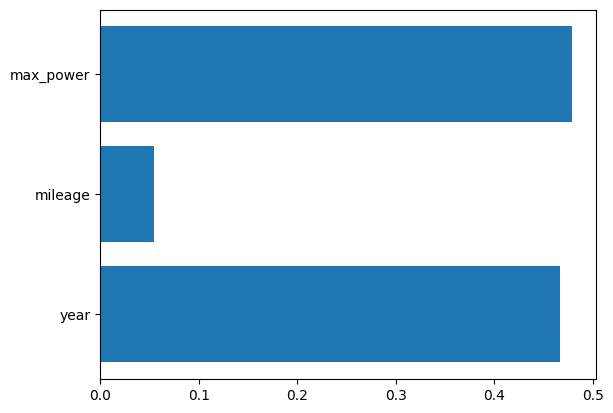

In [487]:
plt.barh(X.columns, rf.feature_importances_)

## Permutation way 

Text(0.5, 0, 'Random Forest Feature Importance')

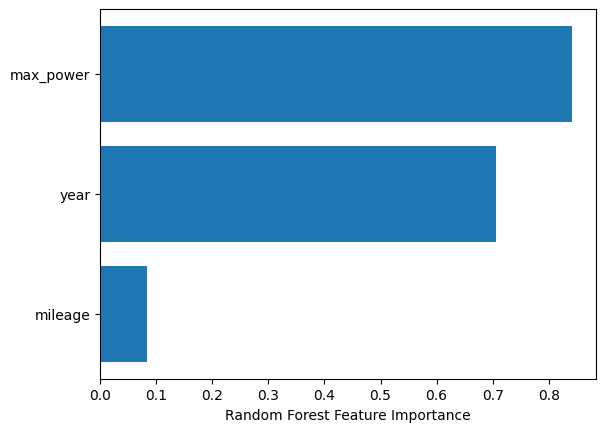

In [488]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_index = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel("Random Forest Feature Importance")

## Shap way

In [489]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

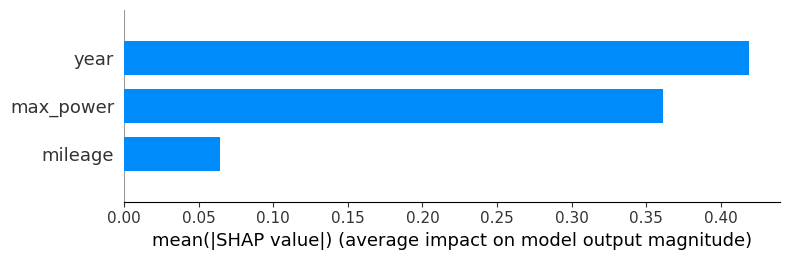

In [490]:
# Plot Shap
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

In [491]:
import pickle

# save the model to disk
filename = 'A1_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [492]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [493]:
print(type(loaded_model))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [511]:
#Test the model with simple input
# df[['engine','mileage','max_power','selling_price']].loc[5]
df[['year','mileage','max_power','selling_price']].loc[100]

year             2009.000000
mileage            21.790000
max_power          67.050000
selling_price      12.128111
Name: 100, dtype: float64

In [495]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [519]:
np.exp(df['selling_price'].loc[1])

370000.0000000001

In [521]:
#['engine', 'mileage','max_power']
# sample = np.array([[2014, 23.4, 74]])
# sample = np.array([[2009, 21.97, 67.05]])
sample = np.array([[2014, 21.14, 103.52]])

In [522]:
# Predict the selling price and taking exponent to show the car selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([397666.01594289])

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.0+ MB
